<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod3_Lab_3_Using_KNN_for_Text_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MODULE: CLASSIFICATION-1
### LAB-3 : Using KNN for Text Classification

### **Section 1: Understanding NLP tools**

Natural Language Processing (NLP) is a discipline within artificial intelligence that leverages linguistics and computer science to make human language intelligible to machines.

### Section 1.2: Data Cleaning and Preprocessing step

**Steps In Data Preprocessing:**
1. Gathering the data
2. Import the dataset & Libraries
3. Dealing with Missing Values
4. Divide the dataset into Dependent & Independent variable
5. dealing with Categorical values
6. Split the dataset into training and test set
7. Feature Scaling

In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...


True

In [4]:
import re
import numpy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup

def cleanText(text, lemmatize, stemmer):
    """Method for cleaning text from train and test data. Removes numbers, punctuation, and capitalization. Stems or lemmatizes text."""

    if isinstance(text, float):
        text = str(text)
    if isinstance(text, numpy.int64):
        text = str(text)
    try:
        text = text.decode()
    except AttributeError:
        pass

    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()
    text = re.sub(r"[^A-Za-z]", " ", text)
    text = text.lower()


    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()

        def get_tag(tag):
            if tag.startswith('J'):
                return wordnet.ADJ
            elif tag.startswith('V'):
                return wordnet.VERB
            elif tag.startswith('N'):
                return wordnet.NOUN
            elif tag.startswith('R'):
                return wordnet.ADV
            else:
                return ''

        text_result = []
        tokens = word_tokenize(text)  # Generate list of tokens
        tagged = pos_tag(tokens)
        for t in tagged:
            try:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0], get_tag(t[1][:2])))
            except:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0]))
        return text_result

    if stemmer:
        text_result = []
        tokens = word_tokenize(text)
        snowball_stemmer = SnowballStemmer('english')
        for t in tokens:
            text_result.append(snowball_stemmer.stem(t))
        return text_result

In [5]:
sample_text = "Troubling"
sample_text_result = cleanText(sample_text, lemmatize=False, stemmer=True)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text)
print(sample_text_result)
sample_text_result = cleanText(sample_text, lemmatize=True, stemmer=False)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text_result)

Troubling
troubl
trouble


## **Section 1.2: BAG OF WORDS**
Bag-of-words(BoW) is a statistical language model used to analyze text and documents based on word count. The model does not account for word order within a document. BoW can be implemented as a Python dictionary with each key set to a word and each value set to the number of times that word appears in a text.

In [6]:
5*12

60

In [7]:
5*10

50

In [8]:
# Functions to convert document(s) to a list of words, with the option of removing stopwords. Returns document-term matrix.

def createBagOfWords(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = CountVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer = CountVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    bag_of_words_train = vectorizer.fit_transform(clean_train).toarray()
    bag_of_words_test = vectorizer.transform(clean_test).toarray()
    return bag_of_words_train, bag_of_words_test


### **Section 1.3: TF-IDF**

**Term Frequency:** TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.


**Inverse Document Frequency:** IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).


The TF-IDF of a term is calculated by multiplying TF and IDF scores.

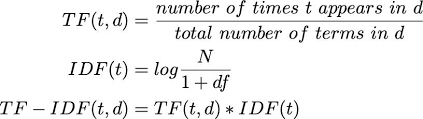

In [9]:
def createTFIDF(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = TfidfVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    tfidf_train = vectorizer.fit_transform(clean_train).toarray()
    tfidf_test = vectorizer.transform(clean_test).toarray()
    return tfidf_train, tfidf_test

### **Section 2: UNDERSTANDING THE DATA: REVIEWS DATASET**

Sentimental analysis is the interpretation and classification of the emotions(positive, negative and neutral).

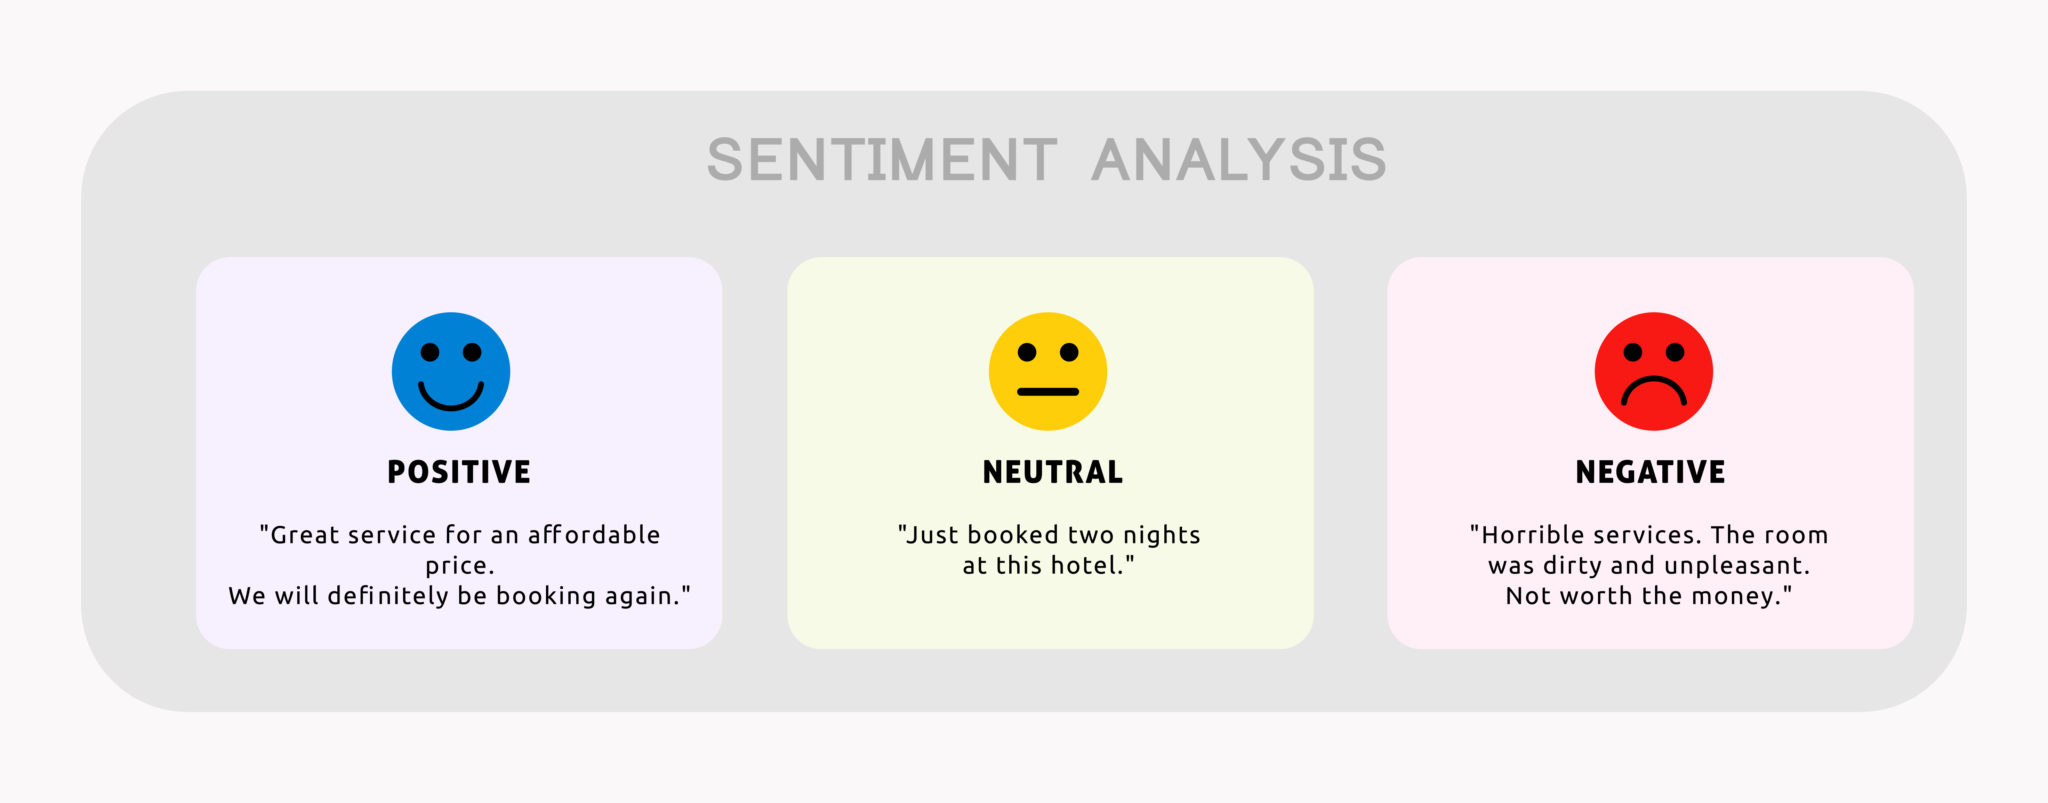

In [10]:
# Upload the Reviews CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [11]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [12]:
df = df.dropna()

In [13]:
df

,sentence,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
...,...,...
994,I just got bored watching Jessice Lange take h...,0
995,"Unfortunately, any virtue in this film's produ...",0
996,"In a word, it is embarrassing.",0
997,Exceptionally bad!,0


In [14]:
df.to_csv('reviews.csv', index=False)

## **Section 3: KNN MODEL**

The below given are two KNN models; in the first case we are using Bag-of-Words and in the second case we are using TF-IDF. Note the different metrics and parameters used in each.

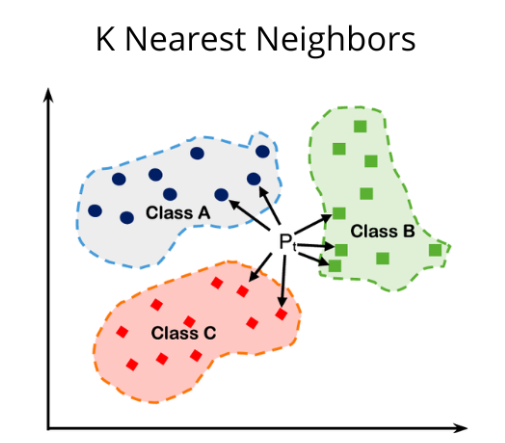

In [15]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [16]:
## KNN accuracy after using BoW
predicted, y_test = bow_knn()

KNN with BOW accuracy = 62.30366492146597%
Cross Validation Accuracy: 0.62
[0.60784314 0.58431373 0.66141732]




In [17]:
## KNN accuracy after using TFIDF
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 70.15706806282722%
Cross Validation Accuracy: 0.73
[0.7254902  0.74117647 0.72834646]


###The accuracy for BoW is approx 62.3

###The accuracy for TF-IDF is approx 70.1

## **TASK-1 see results with different parameters and distance metrics**

In [33]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    # Algorithm is brute, metric is manhattan and n_neighbors = 3
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute', leaf_size=30, p=2, metric='manhattan', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    # Algorithm is auto, metric is chebyshev, n_neighbors=3
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2,
                                         metric='chebyshev', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [34]:
## TASK 1 KNN accuracy after using BoW
predicted, y_test = bow_knn()

KNN with BOW accuracy = 61.25654450261781%
Cross Validation Accuracy: 0.60
[0.60784314 0.59215686 0.59055118]




In [35]:
#Task 1 TDIDF
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 57.59162303664922%
Cross Validation Accuracy: 0.55
[0.54901961 0.5372549  0.57086614]


###The accuracy for BoW is approx 61.2 (Algorithm is brute, metric is manhattan and n_neighbors = 3)

###The accuracy for TF-IDF is approx 57.5 (Algorithm is auto, metric is chebyshev, n_neighbors=3)

## **SECTION 4: SPAM TEXT DATASET**

The dataset is classified text as spam or not spam.

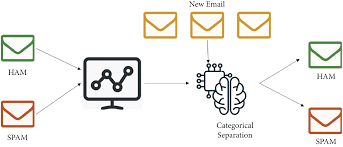

In [36]:
# Upload the spam text data CSV file that has been shared with you. You can also download the file from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [37]:
# Replace the error_bad_lines argument with on_bad_lines
df = pd.read_csv('spam.csv', on_bad_lines='skip')  # Adjust the handling of bad lines as per your requirement ('skip', 'warn', 'error', etc.)


In [38]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [40]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
len(df)

5572

In [42]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 2: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2, metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [25]:
predicted, y_test = bow_knn()

KNN with BOW accuracy = 92.19730941704036%
Cross Validation Accuracy: 0.91
[0.90713324 0.90040377 0.91245791]




In [27]:
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 98.56502242152466%
Cross Validation Accuracy: 0.97
[0.96837147 0.96769852 0.96363636]


### KNN with BoW accuracy is 92.1
### KNN with TFIDF accuracy is 98.5

### **TASK - 2: See results with different parameters and distance metrics.**

In [46]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='manhattan', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='brute', leaf_size=30, p=2, metric='chebyshev', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [47]:
predicted, y_test = bow_knn()

KNN with BOW accuracy = 93.00448430493273%
Cross Validation Accuracy: 0.92
[0.92597577 0.91184388 0.92053872]




In [48]:
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 91.92825112107623%
Cross Validation Accuracy: 0.78
[0.52355316 0.90915209 0.8996633 ]


### KNN with BoW accuracy is 93.0 (n_neighbor=3, Algorithm= Auto,metric= manhattan)

### KNN with TFIDF accuracy is 91.2(n_neighbor=3, Algorithm= brute,metric= chebyshev)

**Why does the TF-IDF approach generally result in a better accuracy than Bag-of-Words ?**

*Reasons why TF-IDF might yield better accuracy than Bag-of-Words:*

1. **Term Importance**: TF-IDF considers the importance of words based on their frequency in a specific document and their rarity across the corpus. This allows it to focus on more meaningful and discriminative terms, potentially improving accuracy by emphasizing relevant words.
2. **Handling Common Words**: TF-IDF reduces the impact of common words that might not carry much meaning (e.g., 'the', 'is', 'and') by assigning them lower weights compared to less frequent, potentially more informative words.
3. **Contextual Importance**: By taking into account both local (within a document) and global (across the corpus) statistics, TF-IDF captures the contextual importance of words better than Bag-of-Words.
4. **Noise Reduction**: TF-IDF can reduce the influence of noisy or less relevant terms that might appear frequently in a particular document but are not significant across the corpus.
  However, the effectiveness of TF-IDF over Bag-of-Words might vary depending on the specific task, dataset, and the nature of the text being analyzed. In certain scenarios, such as sentiment analysis or document classification, TF-IDF's ability to focus on important and distinctive terms can indeed lead to better accuracy compared to the simpler Bag-of-Words approach.







### **Can you think of techniques that are better than both BoW and TF-IDF ?**

1. **Word Embeddings (e.g., Word2Vec, GloVe, FastText):**
Word embeddings represent words as dense, low-dimensional vectors where semantically similar words have similar vector representations.
These embeddings capture semantic relationships and contextual information better than BoW or TF-IDF.
They encode meanings and contexts of words, allowing algorithms to understand the relationships between words.

2. **BERT(Bidirectional Encoder Representations from Transformers):**
BERT is a transformer-based model designed for pre-training deep bidirectional representations from unlabeled text.
It captures the bidirectional context in a sentence, allowing a deeper understanding of word meanings in context.
BERT embeddings have shown superior performance in various NLP tasks, including sentiment analysis, question answering, and text classification.

3. **ELMo (Embeddings from Language Models):**
ELMo generates word embeddings by considering the entire input sentence rather than generating a fixed embedding for each word.
It captures word meanings based on their contextual usage within a sentence.
ELMo embeddings are contextualized and can better represent polysemy (multiple meanings of a word) and homonymy (same form but different meanings).

4. **Transformer-based models:**
Transformer models use attention mechanisms to capture relationships between words in a sequence.
They have shown remarkable performance in various NLP tasks due to their ability to handle long-range dependencies and capture context effectively.
Models like GPT-3 and T5 have achieved state-of-the-art results in language understanding, generation, and translation tasks.

### **Read about Stemming and Lemmatization from the resources given below. Think about the pros/cons of each.**
**Stemming**:

**Pros:**

***Computational Efficiency***: Stemming is generally faster than lemmatization as it follows simpler rules to chop off word suffixes.
Reduction of Words: It reduces words to their stems, which can help in text indexing and retrieval by consolidating variations of words to a common base form.
***Simple Implementation***: Stemming algorithms are relatively straightforward to implement, making them easy to use in various NLP applications.

**Cons:**

***Overstemming or Understemming***: Stemming algorithms may over-stem (cut off too much and create non-words) or under-stem (leave variations of the same root) in certain cases, leading to inaccuracies or loss of meaning.

***Lack of Linguistic Accuracy***: Stemming does not consider the context or semantics of words, potentially resulting in ambiguous or incorrect root forms.
Limited Language Support: Stemmers are language-specific and might not perform equally well across all languages or dialects.

**Lemmatization:**

**Pros:**

**Linguistic Accuracy**: Lemmatization aims to find the base or dictionary form of a word, considering its morphological analysis based on the dictionary, which results in more accurate root forms.

***Improved Semantic Understanding:*** It considers the part of speech (POS) of words, providing more contextually accurate results compared to stemming.
Better Performance in Information Retrieval: Lemmatization helps in better understanding and representation of text, especially in applications requiring semantic understanding like question answering or machine translation.

**Cons:**

***Higher Complexity***: Lemmatization algorithms tend to be more complex and computationally intensive than stemming algorithms.
Resource Intensiveness: Lemmatization often requires linguistic resources like POS taggers and dictionaries, making it more resource-demanding.

***Slower Processing:*** Due to its linguistic analysis and complexity, lemmatization might be slower than stemming.

In summary, while stemming is faster and simpler, it might sacrifice accuracy and linguistic precision. Lemmatization, on the other hand, provides more accurate results but comes with increased computational complexity and resource requirements. The choice between stemming and lemmatization depends on the specific requirements of the NLP task and the trade-offs between speed, accuracy, and linguistic precision.